<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/r_colab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# New Section

In [11]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)


Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend



Attaching package: ‘TSA’


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 

Loading required package: timeDate


Attaching package: ‘timeDate’


The following objects are masked from ‘package:TSA’:

    kurtosis, skewness


The following objects are masked from ‘package:PerformanceAnalytics’:

    kurtosis, skewness


Loading required package: timeSeries


Attaching package: ‘timeSeries’


The following object is masked from ‘package:qrmtools’:

    returns


The following object is masked from ‘package:zoo’:

    time<-



Attaching package: ‘fBasics’


The following object is maske

In [ ]:
get_start_date <- function(num_years=5) {
  return(Sys.Date() - years(num_years))
}

start_date <- get_start_date()
start_date


In [ ]:
# Download data from Yahoo Finance
hdfc<-getSymbols("HDFC.NS",from=start_date,auto.assign=FALSE)



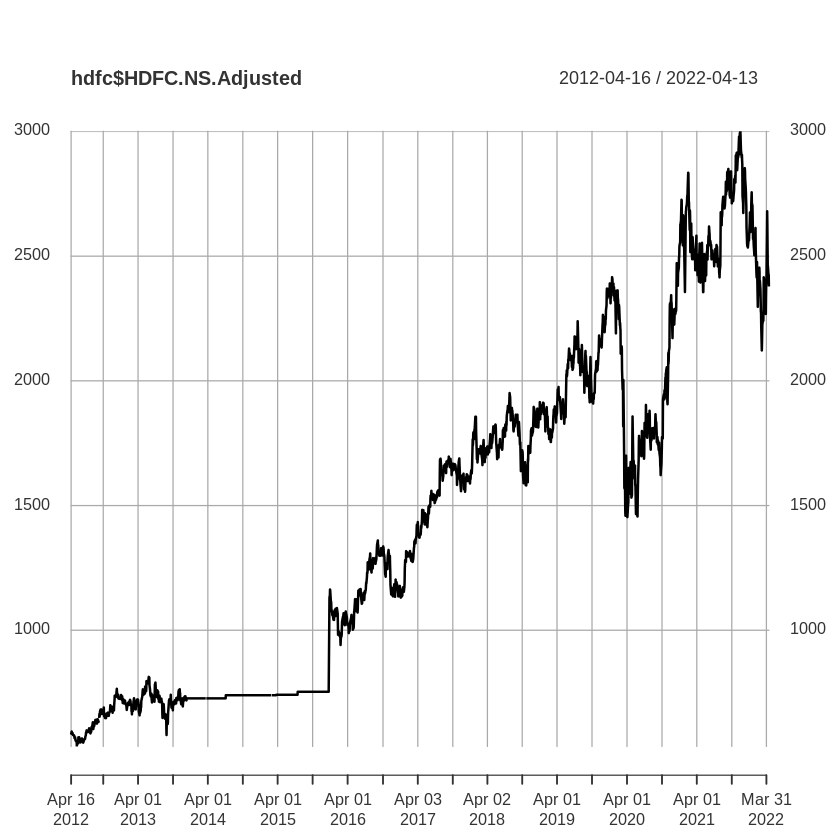

In [21]:
plot(hdfc$HDFC.NS.Adjusted)

In [24]:
summary(hdfc)# To understand any missing values in any columns, NA's   :4   
hdfc<-na.omit(hdfc)
hdfc<-hdfc[hdfc$HDFC.NS.Volume>0,]

     Index             HDFC.NS.Open     HDFC.NS.High     HDFC.NS.Low    
 Min.   :2012-04-16   Min.   : 624.3   Min.   : 637.5   Min.   : 610.5  
 1st Qu.:2014-10-13   1st Qu.: 818.2   1st Qu.: 818.2   1st Qu.: 818.2  
 Median :2017-04-18   Median :1510.1   Median :1531.0   Median :1487.1  
 Mean   :2017-04-14   Mean   :1511.8   Mean   :1526.5   Mean   :1495.2  
 3rd Qu.:2019-10-22   3rd Qu.:1979.8   3rd Qu.:1995.0   3rd Qu.:1957.1  
 Max.   :2022-04-13   Max.   :3004.0   Max.   :3021.1   Max.   :2971.0  
                      NA's   :4        NA's   :4        NA's   :4       
 HDFC.NS.Close    HDFC.NS.Volume     HDFC.NS.Adjusted
 Min.   : 620.9   Min.   :       0   Min.   : 533.9  
 1st Qu.: 818.2   1st Qu.: 1408933   1st Qu.: 739.5  
 Median :1507.5   Median : 2454891   Median :1420.9  
 Mean   :1510.9   Mean   : 2721104   Mean   :1437.5  
 3rd Qu.:1977.4   3rd Qu.: 3596629   3rd Qu.:1891.5  
 Max.   :3000.9   Max.   :59757409   Max.   :3000.9  
 NA's   :4        NA's   :4          N

     Index             HDFC.NS.Open     HDFC.NS.High     HDFC.NS.Low    
 Min.   :2012-04-16   Min.   : 624.3   Min.   : 637.5   Min.   : 610.5  
 1st Qu.:2016-04-28   1st Qu.:1184.3   1st Qu.:1199.3   1st Qu.:1169.0  
 Median :2018-04-21   Median :1768.2   Median :1783.3   Median :1746.0  
 Mean   :2017-11-18   Mean   :1687.8   Mean   :1706.3   Mean   :1667.0  
 3rd Qu.:2020-04-26   3rd Qu.:2147.4   3rd Qu.:2174.8   3rd Qu.:2117.6  
 Max.   :2022-04-13   Max.   :3004.0   Max.   :3021.1   Max.   :2971.0  
 HDFC.NS.Close    HDFC.NS.Volume     HDFC.NS.Adjusted
 Min.   : 620.9   Min.   :  119832   Min.   : 533.9  
 1st Qu.:1179.8   1st Qu.: 2107377   1st Qu.:1086.3  
 Median :1765.8   Median : 2828070   Median :1680.5  
 Mean   :1686.7   Mean   : 3411761   Mean   :1614.7  
 3rd Qu.:2147.8   3rd Qu.: 3988338   3rd Qu.:2074.7  
 Max.   :3000.9   Max.   :59757409   Max.   :3000.9  

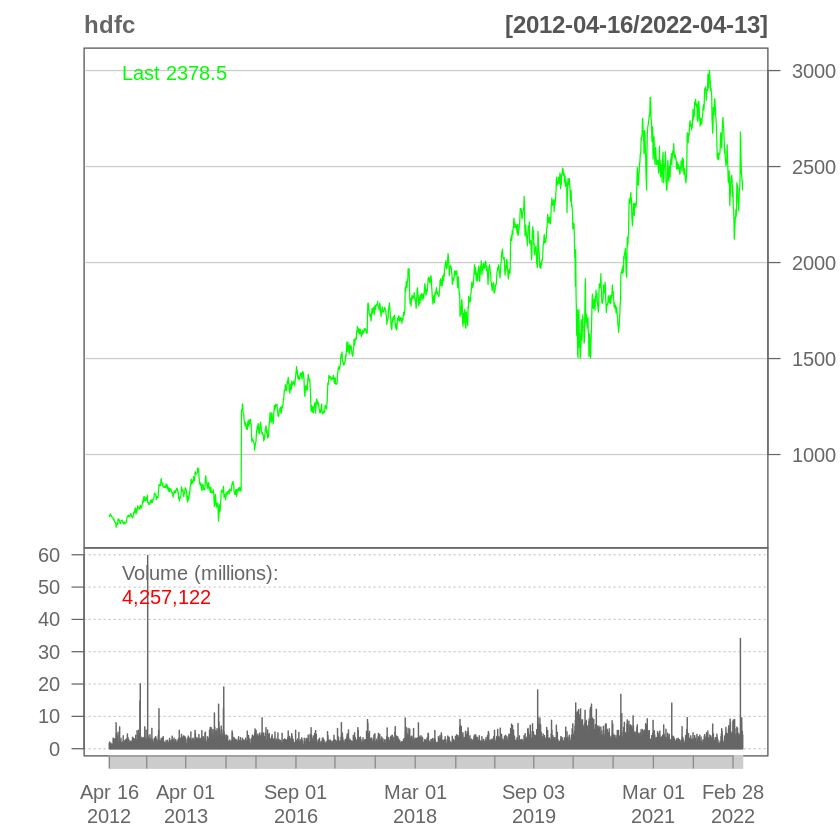

In [25]:
chartSeries(hdfc,theme="white.mono",name="hdfc",type = 'line', up.col = "green",dn.col="red")

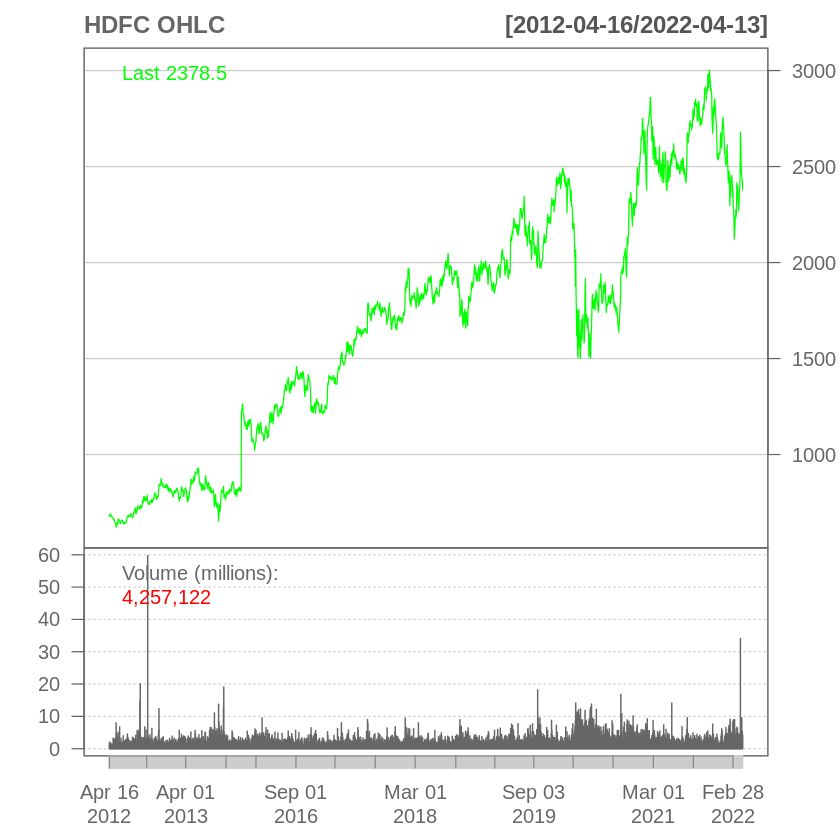

ERROR: ignored

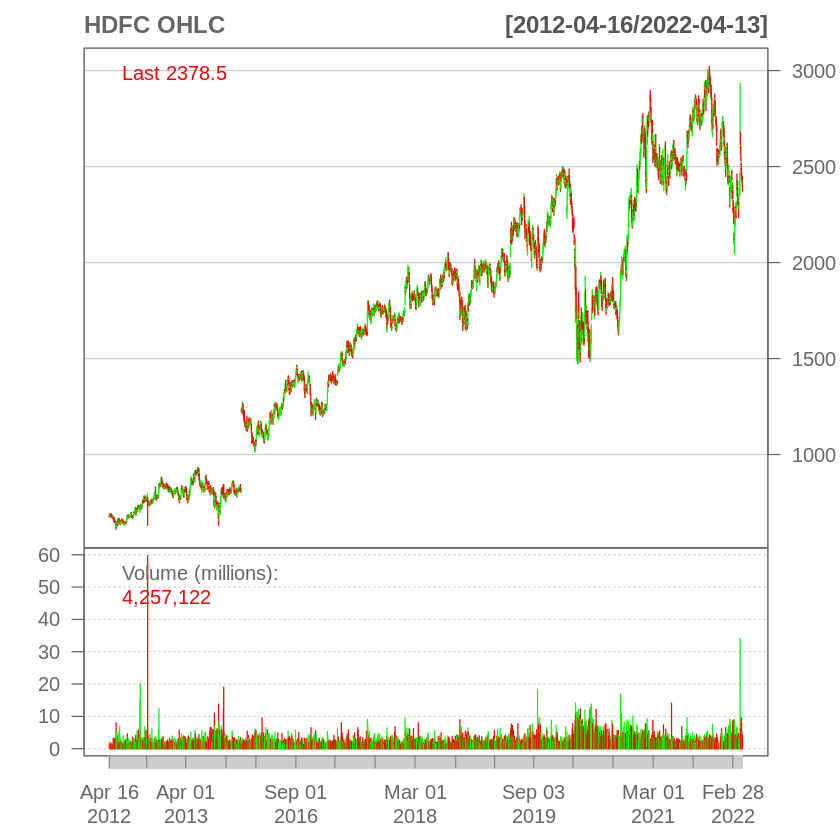

In [32]:
# Convert the Yahoo data into an OHLC Chart
hdfc_ohlc<-as.quantmod.OHLC(hdfc[,-6],col.names=c("Open","High","Low","Close","Volume"))
# Plotting the Open High Low Close charts along with volume
chartSeries(hdfc_ohlc, theme="white.mono", type ='line', name="HDFC OHLC", up.col = "green",dn.col="red")
chartSeries(hdfc_ohlc, theme="white.mono", type ='bar',  name="HDFC OHLC", up.col = "green",dn.col="red")
# chartSeries(hdfc_ohlc, theme="white.mono", type ='hlc',  name="HDFC OHLC", up.col = "green",dn.col="red")

In [35]:
# COmputing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
hdfc_returns<-Return.calculate(hdfc$HDFC.NS.Adjusted,method = "log")
hdfc_returns<-na.omit(hdfc_returns)
head(hdfc_returns)
write.csv(hdfc_returns,"hdfc_returns.csv",row.names=FALSE)

           HDFC.NS.Adjusted
2012-04-17     0.0088128025
2012-04-18    -0.0050582258
2012-04-19     0.0150260014
2012-04-20    -0.0086526469
2012-04-23    -0.0018999548
2012-04-24    -0.0005855839

In [47]:
#Exploratory Data Analysis
#Calculating descriptive statistics

#Test of Normality
# p-value is less than 0.5, hence data price data is not normal 
# Basic idea is this - if the data is normal then we should use tests which work on normal data
# or if the data is not normal, then we should use other tests suitable for non-normal data
# given below 4 tests work well for normal data.
# The central limit theorem (CLT) states that the distribution of sample means approximates 
# a normal distribution as the sample size gets larger, regardless of the population's distribution. 
# Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.
# data from NSE/BSE is more accurate than from Yahoo, but need to do a lot of cleansing.
prices<-hdfc[,6]
prices <- na.omit(prices)
jarqueberaTest(prices$HDFC.NS.Adjusted)


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 79.8401
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Fri Apr 15 16:25:48 2022 by user: 


In [49]:
# same test on returns data
# p-value is less than 0.5, hence returns data is not normal for HDFC
jarqueberaTest(hdfc_returns$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 821248.9747
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Fri Apr 15 16:27:24 2022 by user: 


In [50]:
# Now we do other tests for same data for cross check
shapiroTest(prices$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9563
  P VALUE:
    < 2.2e-16 

Description:
 Fri Apr 15 16:28:57 2022 by user: 


In [51]:
# hdfc return are 0.1809 shows it to be normal again.
shapiroTest(hdfc_returns$HDFC.NS.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.7873
  P VALUE:
    < 2.2e-16 

Description:
 Fri Apr 15 16:29:05 2022 by user: 


In [52]:
# Test for stationarity - Augmented Dickey-Fuller Test
adf.test(prices$HDFC.NS.Adjusted) #  p-value = 0.41, not stationary




	Augmented Dickey-Fuller Test

data:  prices$HDFC.NS.Adjusted
Dickey-Fuller = -3.1433, Lag order = 12, p-value = 0.09768
alternative hypothesis: stationary


In [53]:
adf.test(hdfc_returns$HDFC.NS.Adjusted) 

Warning message in adf.test(hdfc_returns$HDFC.NS.Adjusted):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  hdfc_returns$HDFC.NS.Adjusted
Dickey-Fuller = -12.799, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary


In [54]:
# altrenative to adf.test, as adf is not giving required results
summary(ur.df(prices$HDFC.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-228.83  -13.40   -0.03   14.20  403.05 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
z.lag.1    0.0002474  0.0004366   0.567    0.571
z.diff.lag 0.0174929  0.0225947   0.774    0.439

Residual standard error: 33.68 on 1962 degrees of freedom
Multiple R-squared:  0.0004846,	Adjusted R-squared:  -0.0005343 
F-statistic: 0.4756 on 2 and 1962 DF,  p-value: 0.6216


Value of test-statistic is: 0.5668 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [55]:
summary(ur.df(hdfc_returns$HDFC.NS.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14428 -0.00891  0.00043  0.01017  0.44048 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -1.04112    0.03163 -32.921  < 2e-16 ***
z.diff.lag  0.05847    0.02255   2.593  0.00957 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02108 on 1961 degrees of freedom
Multiple R-squared:  0.4934,	Adjusted R-squared:  0.4929 
F-statistic: 955.1 on 2 and 1961 DF,  p-value: < 2.2e-16


Value of test-statistic is: -32.9208 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [56]:
summary(ur.kpss(prices$HDFC.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 8 lags. 

Value of test-statistic is: 19.9519 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [57]:
summary(ur.kpss(hdfc_returns$HDFC.NS.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 8 lags. 

Value of test-statistic is: 0.1023 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739
